# Q.1. 

Explain the dot product and cross product in your own words in markdown. 

The dot product is a way to combine two vectors where the result is another scalar number. It measures how much two vectors point in the same direction. The dot product is written as:

  $$\vec{p} \cdot \vec{q}=\left | \vec{p} \right |\left | \vec{q} \right |\cos\theta $$

The cross product is an operation between vectors where the result is another vector. This third vector is always perpendicular to the first vector, and helps measure how much two vectors point in different directions. The cross product is written as:

   $$|\vec{c}| =|\vec{a}||\vec{b}|\sin\theta $$



# Q.2.

Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.  

In [1]:
import numpy as np
import math

def angle_between(v1,v2):
    if np.linalg.norm(v1) == 0 or np.linalg.norm(v2) == 0: #when the value is zero we get an error
        print("Vector is zero magnitude")
    else:
        unit_v1 = v1 / np.linalg.norm(v1) #for the dot product formula we need np.linalg
        unit_v2 = v2 / np.linalg.norm(v2)
        dot_product = np.dot(unit_v1, unit_v2)
        angle = np.arccos(dot_product) #to keep the angle in radians
        
    return angle
v1= np.random.randint(8, size=(3,3)) #make a random vector
print(v1)
v2= np.random.randint(5, size=(3,3))
print(v2)

angle_between(v1,v2)            

[[2 3 4]
 [3 2 4]
 [0 1 7]]
[[0 1 2]
 [2 3 4]
 [2 2 1]]


array([[1.36388454, 1.28824215, 1.27292741],
       [1.39378318, 1.31867262, 1.30348908],
       [1.33379698, 1.31867262, 1.40867103]])

# Q.3.

Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0). 

In [2]:
def row_dot(A, r1, r2):
    if r1<=0 or r2<=0:
        print('Error: Need positive row number')
    else:
        dot_product= np.dot(A[r1-1], A[r2-1]) #since the index starts at 0, we subtract one from whatever row number is given to get the row index we need
    
    return dot_product

A=np.array([[2,3,3],[7,3,2],[5,1,6]])


row_dot(A, 2, 3)
        

50

# Q.4.

Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division? 

The trick to matrix division is that to divide in a matrix algebra world we first need to invert the matrix and then multiply that inverse

In [3]:

def matrix_division(m1, m2):
    result = [[0 for x in range(3)] for y in range(3)]
    m2_inverse = np.linalg.inv(m2)
    print(m2_inverse)
    for i in range(len(m1)):
        for j in range(len(m2_inverse[0])):
            for k in range(len(m2_inverse)):
                result[i][j] += m1[i][k] * m2_inverse[k][j]
    return result 
m1= np.random.randint(6, size=(3,3))
print(m1)
m2= np.random.randint(5, size=(3,3))
print(m2)
print(matrix_division(m1,m2))


[[5 1 2]
 [2 1 1]
 [5 5 5]]
[[3 1 0]
 [0 1 1]
 [1 2 4]]
[[ 0.28571429 -0.57142857  0.14285714]
 [ 0.14285714  1.71428571 -0.42857143]
 [-0.14285714 -0.71428571  0.42857143]]
[[1.2857142857142856, -2.571428571428571, 1.1428571428571428], [0.5714285714285714, -0.1428571428571429, 0.2857142857142857], [1.4285714285714282, 2.142857142857143, 0.7142857142857144]]


 # Q.5.

Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise.  

In [4]:
def is_orthogonal(v1,v2,tol):
    v1=np.ravel(v1) #use to get both vectors on same dimension
    v2=np.ravel(v2)
    try:
        if tol<0:
            print('Tol must be  larger than 0')
        else:        
            unit_v1 = v1 / np.linalg.norm(v1)
            unit_v2 = v2 / np.linalg.norm(v2)
            dot_product = np.dot(unit_v1, unit_v2)
            angle = np.arccos(dot_product)
            
            if abs(math.pi/2-angle)<tol:
                print('1')
            else:
                return 0
    except Exception as e:
        print(e)

v1 = np.array([[1], [0.001]])
v2 = np.array([[0.001], [1]]) 
tol=0.01 
is_orthogonal(v1,v2,tol)

1


In [5]:
v1 = np.array([[1], [0.001]]) 
v2 = np.array([[0.001], [1]]) 
tol=0.01
is_orthogonal(v1,v2,tol)

1


# Q.6.

Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4.  

In [6]:
class vector_calculator():
    def __init__(self, v1, v2):
        self.v1=v1
        self.v2=v2
    def angle_between(self):
        v1=np.ravel(self.v1)
        v2=np.ravel(self.v2)
        try:
                if np.linalg.norm(self.v1) == 0 or np.linalg.norm(self.v2) == 0: #when the value is zero we get an error
                    print("Vector is zero magnitude")
                else:
                    unit_v1 = v1 / np.linalg.norm(v1)
                    unit_v2 = v2 / np.linalg.norm(v2)
                    dot_product = np.dot(unit_v1, unit_v2)
                    angle = np.arccos(dot_product)
                    return angle
        except Exception as e:
            return e
    def is_orthogonal(self, tol=0.01):
        v1=np.ravel(self.v1)
        v2=np.ravel(self.v2)
        try:
            if tol<0:
                print('Tol must be  larger than 0')
            else:        
                unit_v1 = v1 / np.linalg.norm(v1)
                unit_v2 = v2 / np.linalg.norm(v2)
                dot_product = np.dot(unit_v1, unit_v2)
                angle = np.arccos(dot_product)
            
                if abs(math.pi/2-angle)<tol:
                    print('1')
                else:
                    return 0
        except Exception as e:
            return e


In [7]:
v1 = np.array([[1], [0.001]]) 
v2 = np.array([[0.001], [1]])
calc=vector_calculator(v1,v2)
calc.tol=0.01
calc.angle_between()
calc.is_orthogonal()

1


# Q.7.

Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers! 

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

In [8]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd 
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

In [9]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [10]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [13]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [14]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [15]:
pca_breast = PCA(n_components=4)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_breast_Df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4
564,6.439315,-3.576818,2.459486,1.177310
565,3.793382,-3.584048,2.088476,-2.506027
566,1.256179,-1.902297,0.562731,-2.089226
567,10.374794,1.672010,-1.877029,-2.356031
568,-5.475243,-0.670637,1.490442,-2.299165


In [16]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135]


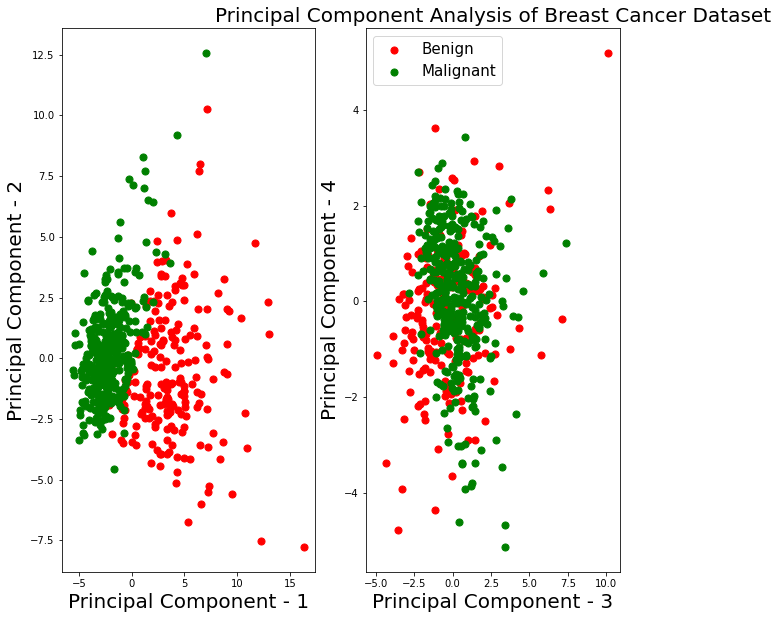

In [17]:
fig,ax=plt.subplots(1, 2, figsize=(10,10))
#ax.xticks(fontsize=12)
#ax.yticks(fontsize=14)
ax[0].set_xlabel('Principal Component - 1',fontsize=20)
ax[0].set_ylabel('Principal Component - 2',fontsize=20)
ax[1].set_xlabel('Principal Component - 3',fontsize=20)
ax[1].set_ylabel('Principal Component - 4',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax[0].scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1'], principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    ax[1].scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 3'], principal_breast_Df.loc[indicesToKeep, 'principal component 4'], c = color, s = 50)
    

plt.legend(targets,prop={'size': 15})